## kNN

In [1]:
import pandas as pd
import numpy as np
import pickle

In [5]:
from sklearn.neighbors import KNeighborsClassifier

### Credit data

In [2]:
with open('credit.pkl', 'rb') as f:
    x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [3]:
x_credit_training.shape, y_credit_training.shape, x_credit_test.shape, y_credit_test.shape

((1500, 3), (1500,), (500, 3), (500,))

In [6]:
knn_credit = KNeighborsClassifier(n_neighbors= 5,
                                  metric = 'minkowski', p=2 #for euclidean distance
                                  )
knn_credit.fit(x_credit_training,y_credit_training)

KNeighborsClassifier()

In [7]:
prediction = knn_credit.predict(x_credit_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [8]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_test,prediction)

0.986

0.986

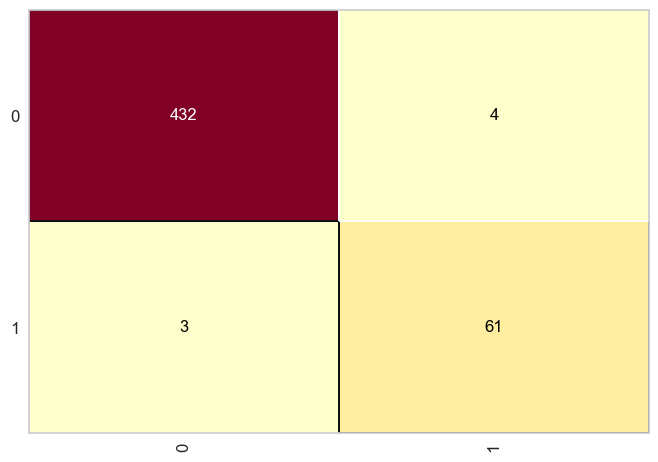

In [10]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix = ConfusionMatrix(knn_credit)
confusion_matrix.fit(x_credit_training,y_credit_training)
confusion_matrix.score(x_credit_test,y_credit_test)

In [11]:
print(classification_report(y_credit_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



### Census data

In [12]:
with open('census.pkl', 'rb') as f:
    x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)

In [13]:
x_census_training.shape, y_census_training.shape, x_census_test.shape, y_census_test.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [22]:
knn_census = KNeighborsClassifier(n_neighbors= 10,
                                  metric = 'minkowski', p=2 #for euclidean distance
                                  )
knn_census.fit(x_census_training,y_census_training)

KNeighborsClassifier(n_neighbors=10)

In [23]:
prediction = knn_census.predict(x_census_test)
prediction

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [24]:
accuracy_score(y_census_test,prediction)

0.8290685772773797

0.8290685772773797

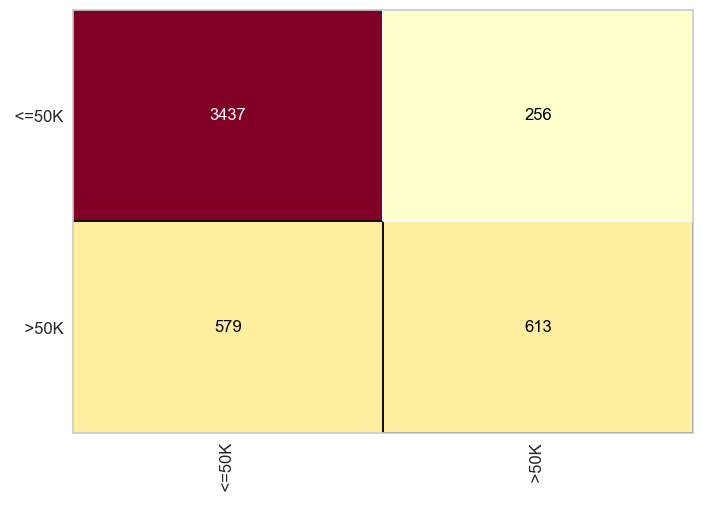

In [25]:
confusion_matrix = ConfusionMatrix(knn_census)
confusion_matrix.fit(x_census_training,y_census_training)
confusion_matrix.score(x_census_test,y_census_test)

In [26]:
print(classification_report(y_census_test,prediction))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885

